In [2]:
!git clone https://github.com/Gokulapps/Pytorch-Model-Training-Base-Repo

fatal: destination path 'Pytorch-Model-Training-Base-Repo' already exists and is not an empty directory.


In [5]:
%matplotlib inline
import torch 
import torchvision 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim 
import torch.autograd as grad
import matplotlib.pyplot as plt
import numpy as np
import argparse
import warnings
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from models.resnet import ResNet18 
from models.custom_resnet import CustomResnet
from models.transformer import Basic_Transformer
from utils import *
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from copy import deepcopy
warnings.filterwarnings("ignore")

=> Parallelizing Training across Multiple GPU's


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Finding Maximum Learning Rate for the Model
Iteration 1 with Values between 0.0001 and 4


  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
Maximum Learning Rate Found by LRFinder = 0.004384711282705933
Iteration 2 with Values between 0.00043847112827059327 and 0.04384711282705933


  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
Maximum Learning Rate Found by LRFinder = 0.015122703736828088
Training Logs...
EPOCH: 1


Loss=2.302639961242676 Batch_id=97 Accuracy=9.84: 100%|██████████| 98/98 [00:07<00:00, 13.91it/s]  



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 2


Loss=2.302842140197754 Batch_id=97 Accuracy=9.88: 100%|██████████| 98/98 [00:06<00:00, 14.01it/s]  



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 3


Loss=2.3029720783233643 Batch_id=97 Accuracy=9.76: 100%|██████████| 98/98 [00:07<00:00, 13.18it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 4


Loss=2.3026649951934814 Batch_id=97 Accuracy=9.52: 100%|██████████| 98/98 [00:07<00:00, 13.55it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 5


Loss=2.3025286197662354 Batch_id=97 Accuracy=9.97: 100%|██████████| 98/98 [00:07<00:00, 13.96it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 6


Loss=2.3035707473754883 Batch_id=97 Accuracy=9.86: 100%|██████████| 98/98 [00:07<00:00, 13.78it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 7


Loss=2.30260968208313 Batch_id=97 Accuracy=9.88: 100%|██████████| 98/98 [00:07<00:00, 13.56it/s]   



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 8


Loss=2.302818536758423 Batch_id=97 Accuracy=9.81: 100%|██████████| 98/98 [00:06<00:00, 14.15it/s]  



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 9


Loss=2.3024799823760986 Batch_id=97 Accuracy=9.81: 100%|██████████| 98/98 [00:07<00:00, 13.17it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 10


Loss=2.3023836612701416 Batch_id=97 Accuracy=9.83: 100%|██████████| 98/98 [00:07<00:00, 13.47it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 11


Loss=2.3027584552764893 Batch_id=97 Accuracy=9.73: 100%|██████████| 98/98 [00:07<00:00, 13.15it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 12


Loss=2.3026058673858643 Batch_id=97 Accuracy=9.84: 100%|██████████| 98/98 [00:06<00:00, 14.30it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 13


Loss=2.3026862144470215 Batch_id=97 Accuracy=9.72: 100%|██████████| 98/98 [00:07<00:00, 14.00it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 14


Loss=2.3027656078338623 Batch_id=97 Accuracy=9.81: 100%|██████████| 98/98 [00:07<00:00, 12.98it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 15


Loss=2.3025176525115967 Batch_id=97 Accuracy=9.73: 100%|██████████| 98/98 [00:07<00:00, 13.69it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 16


Loss=2.3027195930480957 Batch_id=97 Accuracy=9.93: 100%|██████████| 98/98 [00:06<00:00, 14.19it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 17


Loss=2.3025877475738525 Batch_id=97 Accuracy=9.79: 100%|██████████| 98/98 [00:07<00:00, 13.45it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 18


Loss=2.3026509284973145 Batch_id=97 Accuracy=9.89: 100%|██████████| 98/98 [00:07<00:00, 12.39it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 19


Loss=2.302638530731201 Batch_id=97 Accuracy=9.76: 100%|██████████| 98/98 [00:07<00:00, 13.41it/s]  



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 20


Loss=2.3025927543640137 Batch_id=97 Accuracy=9.83: 100%|██████████| 98/98 [00:06<00:00, 14.33it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 21


Loss=2.3025991916656494 Batch_id=97 Accuracy=9.80: 100%|██████████| 98/98 [00:06<00:00, 14.11it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 22


Loss=2.302560806274414 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 12.79it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 23


Loss=2.3025825023651123 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 13.62it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 24


Loss=2.302567720413208 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:06<00:00, 14.40it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

Model Saved
Plotting Graphs


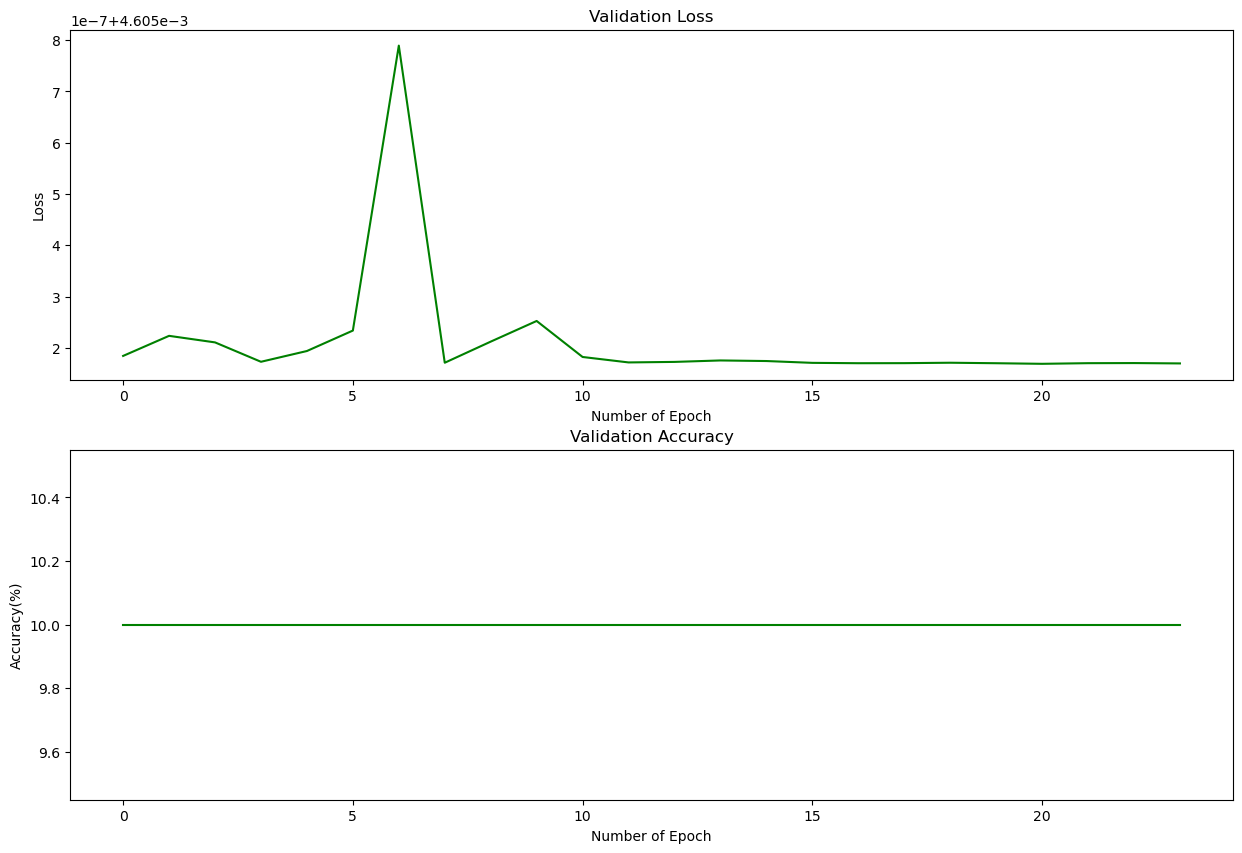

Displaying Sample Images from Dataset
Main File Completed!!!


In [6]:
%matplotlib inline
%run main.py CIFAR10 24 512 0.01 --Adam

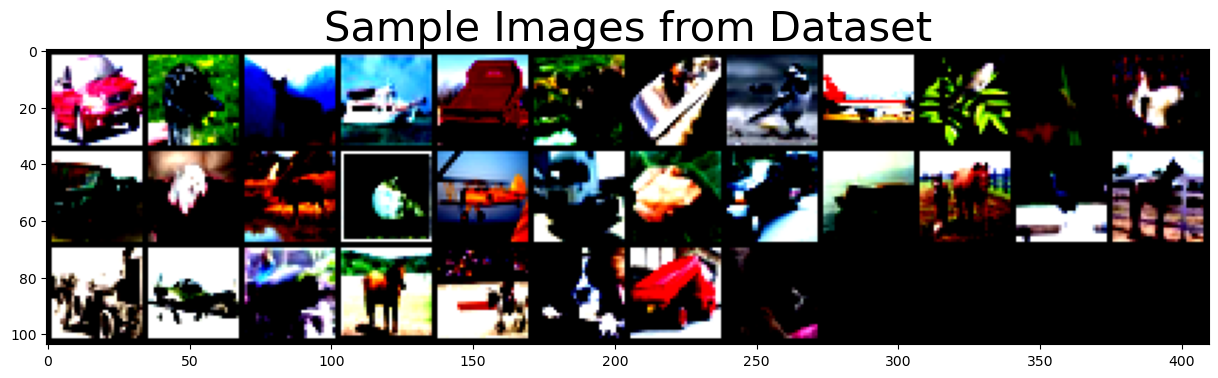

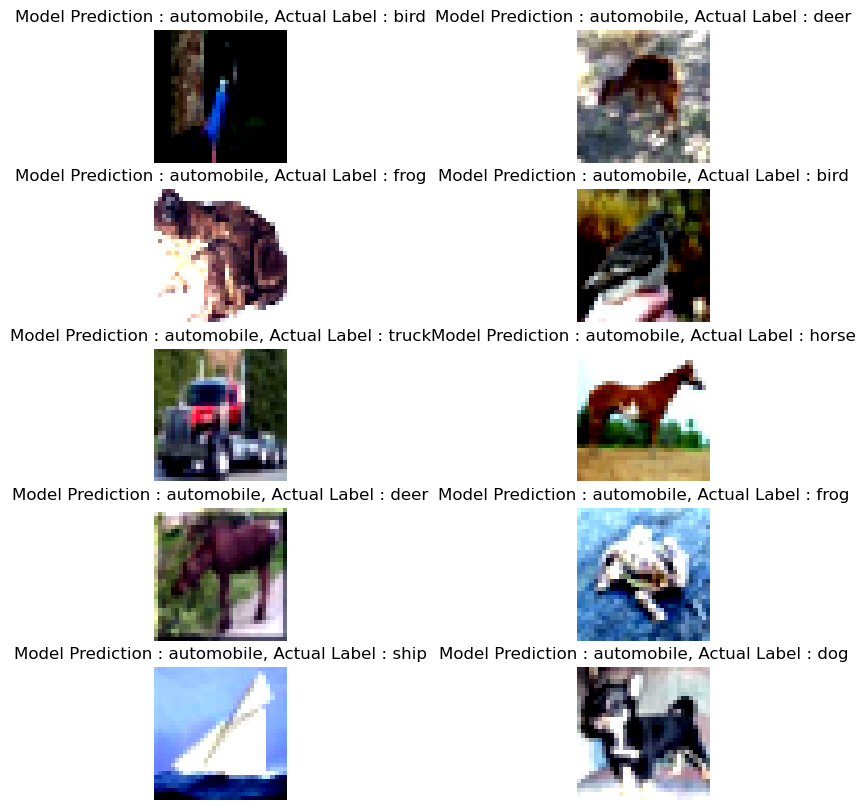

In [8]:
incorrect_predictions = misclassified_images(model, device, test_loader, 10)
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_misclassified_images(incorrect_predictions, classes, 5, 2, 10, fig_size=(10, 10))